# Magic and loading data

In [1]:
# ----------------------------------GENERAL---------------------------------

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# ----------------------------------VISUALIZATION---------------------------

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from matplotlib.colors import LogNorm
import plotly.express as px
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.manifold import TSNE
from statsmodels.tsa.seasonal import seasonal_decompose

# ----------------------------------PIPELINE AND MODELS----------------------

from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.impute import KNNImputer

# ----------------------------------PRE-PROCESSING---------------------------

from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
# importing data

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_excel('/content/drive/MyDrive/07 - Six - Team only/Raw data copy/Time_Series_Merchants_Transactions_Anonymized.xlsx',)

# Setting up data

In [4]:
# replacing index

data = data.set_index('Merchant Name')

In [5]:
# replacing columns names with standard date format

dates = pd.date_range(start='2020-08', end='2022-10', freq="M")
data.columns = dates

In [6]:
merchant_name = data.index

In [7]:
data.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,416772.0,395324.0,411329.0,475679.0,497747.0,445429.0,505033.0,477349.0,496073.0,576800.0,...,644293.0,700144.0,611675.0,639038.0,616915.0,686572.0,630707.0,622073.0,667523.0,668189.0
Merchant 2,21.0,24.0,13.0,21.0,4.0,80.0,1.0,24.0,183.0,31.0,...,11.0,119.0,62.0,52.0,432.0,86.0,108.0,72.0,101.0,80.0
Merchant 3,1.0,1.0,0.0,0.0,50.0,3.0,4.0,4.0,0.0,16.0,...,50.0,0.0,0.0,0.0,0.0,0.0,49.0,1.0,1.0,0.0
Merchant 4,159.0,168.0,155.0,152.0,160.0,149.0,147.0,152.0,170.0,150.0,...,175.0,159.0,180.0,162.0,183.0,172.0,198.0,183.0,226.0,185.0
Merchant 5,70.0,27.0,60.0,63.0,80.0,57.0,75.0,73.0,85.0,96.0,...,132.0,147.0,129.0,127.0,131.0,159.0,150.0,160.0,154.0,168.0


## Scaling

In [8]:
scaler = StandardScaler()

In [9]:
# fitting scasling to data

data_scaled = pd.DataFrame(scaler.fit_transform(data.T).T, columns=data.columns)
data_scaled.insert(0, 'Merchant Name', data.index)
data_scaled = data_scaled.set_index('Merchant Name')
data_scaled.head()

,2020-08-31,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
Merchant Name,,,,,,,,,,,,,,,,,,,,,
Merchant 1,-1.660589,-1.905759,-1.722807,-0.987229,-0.734972,-1.333014,-0.651686,-0.968139,-0.754107,0.168675,...,0.940181,1.578608,0.567328,0.880112,0.627226,1.423468,0.784881,0.686186,1.205721,1.213334
Merchant 2,-0.521556,-0.486119,-0.616053,-0.521556,-0.722363,0.175366,-0.757800,-0.486119,1.392026,-0.403433,...,-0.639678,0.636043,-0.037254,-0.155376,4.333272,0.246240,0.506109,0.080868,0.423423,0.175366
Merchant 3,-0.447953,-0.447953,-0.504491,-0.504491,2.322398,-0.334878,-0.278340,-0.278340,-0.504491,0.400113,...,2.322398,-0.504491,-0.504491,-0.504491,-0.504491,-0.504491,2.265860,-0.447953,-0.447953,-0.504491
Merchant 4,-0.440060,0.064715,-0.664404,-0.832663,-0.383974,-1.000921,-1.113093,-0.832663,0.176887,-0.944835,...,0.457317,-0.440060,0.737748,-0.271802,0.906006,0.289059,1.747297,0.906006,3.317708,1.018178
Merchant 5,-0.991168,-2.150296,-1.260733,-1.179863,-0.721604,-1.341602,-0.856386,-0.910299,-0.586821,-0.290300,...,0.680132,1.084479,0.599263,0.545350,0.653176,1.407956,1.165348,1.434913,1.273174,1.650564


## Data to use

In [10]:
#df = data.T
#df.index.name = 'Month'
#df.head()

In [11]:
df = data_scaled.T
df.index.name = 'Month'
df.head()

Merchant Name,Merchant 1,Merchant 2,Merchant 3,Merchant 4,Merchant 5,Merchant 6,Merchant 7,Merchant 8,Merchant 9,Merchant 10,...,Merchant 1904,Merchant 1905,Merchant 1906,Merchant 1907,Merchant 1908,Merchant 1909,Merchant 1910,Merchant 1911,Merchant 1912,Merchant 1913
Month,,,,,,,,,,,,,,,,,,,,,
2020-08-31 00:00:00,-1.660589,-0.521556,-0.447953,-0.440060,-0.991168,0.015679,-0.286083,-0.284819,0.177867,0.843697,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2020-09-30 00:00:00,-1.905759,-0.486119,-0.447953,0.064715,-2.150296,0.215176,-0.343299,-1.370818,-0.198995,-0.130520,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2020-10-31 00:00:00,-1.722807,-0.616053,-0.504491,-0.664404,-1.260733,0.102417,-0.743815,0.609958,3.946496,-0.301008,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2020-11-30 00:00:00,-0.987229,-0.521556,-0.504491,-0.832663,-1.179863,0.280229,-0.801032,0.597989,-0.294808,2.848959,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2
2020-12-31 00:00:00,-0.734972,-0.722363,2.322398,-0.383974,-0.721604,0.037364,-1.773713,-1.334909,-0.096795,-0.301008,...,-0.2,-0.2,-0.2,-0.2,-0.220422,-0.2,-0.2,-0.2,-0.2,-0.2


In [12]:
# TEST TAKING 25 MERCHANTS ONLY

#df = df.iloc[:, 1:26]
#df.shape

In [13]:
# convert pandas df to numpy array with time-series only

f = df.to_numpy().astype(float)

In [14]:
# create a float vector between 0 and 1 for time index

time = np.linspace(0, 1, len(f))

# FDASRSF package

In [15]:
pip install fdasrsf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.0 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for fdasrsf: filename=fdasrsf-2.3.12-cp37-cp37m-linux_x86_64.whl size=1517447 sha256=b48318b5297c009cdc017eb768b155ffb791bd698c53a638f38e24b27660ad26
  Stored in directory: /root/.cache/pip/wheels/a3/d6/89/c3086febcd579b26a834a76cf4b3dc22a1e6e1f27f7fdd015d
Successfully built fdasrsf


In [16]:
pip install GPy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 959 kB 5.3 MB/s 
     |████████████████████████████████| 71 kB 7.2 MB/s 
  Created wheel for GPy: filename=GPy-1.10.0-cp37-cp37m-linux_x86_64.whl size=2565156 sha256=8881a86d82981272272452d44c608709385c7f175beb73fb3c77b0769d26670e
  Stored in directory: /root/.cache/pip/wheels/f7/18/28/dd1ce0192a81b71a3b086fd952511d088b21e8359ea496860a
  Created wheel for paramz: filename=paramz-0.9.5-py3-none-any.whl size=102566 sha256=d7a158ec9d72ba3e2a4afe61e6378f206cd3e8e3328fa63960bd415c0081f92b
  Stored in directory: /root/.cache/pip/wheels/c8/95/f5/ce28482da28162e6028c4b3a32c41d147395825b3cd62bc810
Successfully built GPy paramz


In [17]:
from fdasrsf import fPCA, time_warping, fdawarp, fdahpca

## Functional alignment

In [18]:
## align time-series

warp_f = time_warping.fdawarp(f, time)
warp_f.srsf_align()

Initializing...
Compute Karcher Mean of 1913 function in SRSF space...
updating step: r=1
updating step: r=2
updating step: r=3
updating step: r=4
updating step: r=5
updating step: r=6
updating step: r=7
updating step: r=8
updating step: r=9
updating step: r=10
updating step: r=11
updating step: r=12
updating step: r=13
updating step: r=14
updating step: r=15
updating step: r=16
updating step: r=17
updating step: r=18
updating step: r=19
updating step: r=20
maximal number of iterations is reached


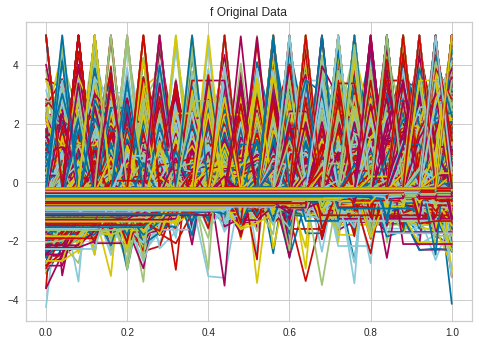

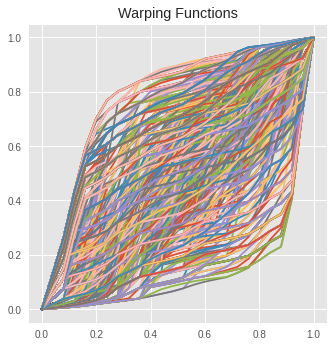

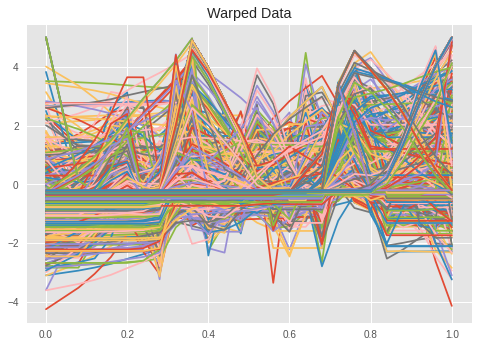

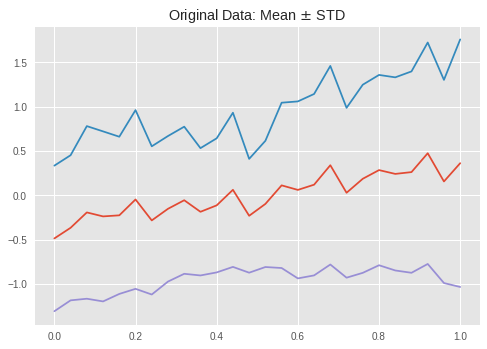

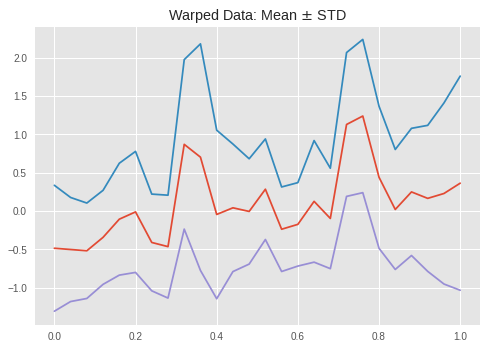

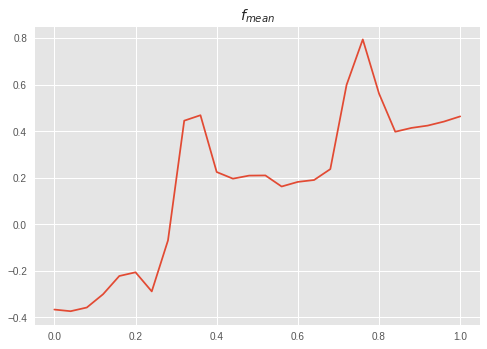

In [19]:
warp_f.plot()

## Functional PCA

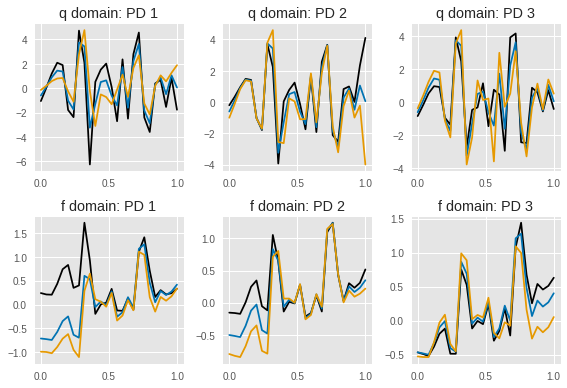

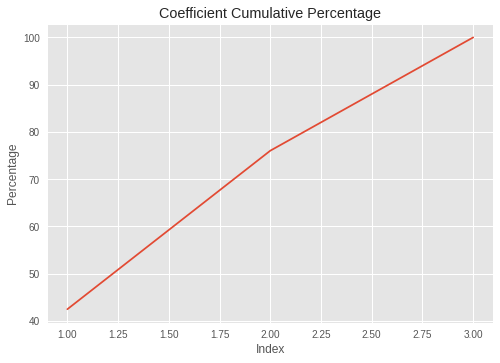

In [20]:
# define the FPCA as a vertical analysis

fPCA_analysis = fPCA.fdavpca(warp_f)

# run the FPCA on a 3 components basis
fPCA_analysis.calc_fpca(no=3)
fPCA_analysis.plot()

In [21]:
import plotly.graph_objects as go

fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:, 0, 0], mode='lines', name="PC1"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:, 0, 1], mode='lines', name="PC2"))
fig.add_trace(go.Scatter(y=fPCA_analysis.f_pca[:, 0, 2], mode='lines', name="PC3"))

fig.update_layout(
    title_text='Principal Components Analysis Functions', title_x=0.5,
)

fig.show()

In [22]:

fPCA_coef = fPCA_analysis.coef
fPCA_coef

array([[-0.77200747, -5.11809314,  2.28266738],
       [-1.42241177,  3.78442051, -0.34385303],
       [-7.92214966, -0.99203319,  2.27643384],
       ...,
       [ 7.48086654, -6.97814092, -0.53269018],
       [ 7.48086654, -6.97814092, -0.53269018],
       [ 7.48086654, -6.97814092, -0.53269018]])

In [23]:
fig = go.Figure(data=go.Scatter(x=fPCA_coef[:, 0], y=fPCA_coef[:, 1], mode='markers+text')) #, text=df.columns

#fig.update_traces(textposition='top center')

fig.update_layout(
    autosize=False,
    width=800,
    height=700,
    title_text='Function Principal Components Analysis', title_x=0.5,
    xaxis_title="PC1",
    yaxis_title="PC2",
)
fig.show()

In [24]:
fig = go.Figure(data=go.Scatter(x=fPCA_coef[:, 0], y=fPCA_coef[:, 1], mode='markers+text')) #, text=df.columns

#fig.update_traces(textposition='top center')

fig.update_layout(
    autosize=False,
    width=800,
    height=700,
    title_text='Function Principal Components Analysis', title_x=0.5,
    xaxis_title="PC1",
    yaxis_title="PC3",
)
fig.show()

In [25]:
fig = go.Figure(data=go.Scatter(x=fPCA_coef[:, 0], y=fPCA_coef[:, 1], mode='markers+text')) #, text=df.columns

#fig.update_traces(textposition='top center')

fig.update_layout(
    autosize=False,
    width=800,
    height=700,
    title_text='Function Principal Components Analysis', title_x=0.5,
    xaxis_title="PC2",
    yaxis_title="PC3",
)
fig.show()